# **Домашнее задание 2**

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [109]:
import numpy as np
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

In [8]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

In [12]:
# Normalize the images.
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [14]:
train_images.shape

(60000, 784)

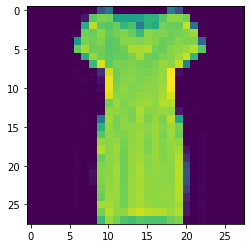

In [13]:
plt.imshow(train_imagesi[20,:,:])
plt.show()

In [23]:
model = Sequential(name='my_model')
model.add(Dense(128, activation='relu', input_shape=(784,)))

model.add(Dense(10, activation='softmax'))

In [24]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [25]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)
y_t[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
# Train the model.
model.fit(  
  train_images,
  y_t,
  epochs=5,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
model.evaluate( 
  test_images,
  y_tt
)

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:5]) 

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6139 - accuracy: 0.7811 - val_loss: 0.4025 - val_accuracy: 0.8494
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3924 - accuracy: 0.8559 - val_loss: 0.3765 - val_accuracy: 0.8610
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3511 - accuracy: 0.8702 - val_loss: 0.3926 - val_accuracy: 0.8548
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3248 - accuracy: 0.8788 - val_loss: 0.3610 - val_accuracy: 0.8649
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3829 - accuracy: 0.8612
[9 2 1 1 6]
[9 2 1 1 6]


**числа нейронов в слое(для 2-хслойной сети)**

In [59]:
results_neurons =  {
    'neurons': [],
    'accuracy_tr': [],
    'accuracy_val': []
    }

In [62]:
#Делаем три прогона, чтобы посмотреть на разброс значений
n = [2, 10, 50, 100, 150, 300, 700]

for i in n:

  model = Sequential(name='my_model')
  model.add(Dense(i, activation='relu', input_shape=(784,)))
  model.add(Dense(10, activation='softmax'))

  model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )
  
  
  hh = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32, validation_split=0.2, verbose = 0
  )

  model.evaluate(
  test_images,
  to_categorical(test_labels)
  ) 

  results_neurons['neurons'].append(i)
  results_neurons['accuracy_tr'].append(hh.history['accuracy'][-1])
  results_neurons['accuracy_val'].append(hh.history['val_accuracy'][-1])

  results_neurons

313/313 [==============================] - 1s 3ms/step - loss: 0.3999 - accuracy: 0.8639


In [103]:
results_neurons = pd.DataFrame(data=results_neurons).sort_values('accuracy_val', ascending=False)

,neurons,accuracy_tr,accuracy_val
11,150,0.888125,0.881167
3,100,0.887958,0.881167
17,100,0.885333,0.880167
13,700,0.891583,0.880167
18,150,0.888875,0.879250
19,300,0.889188,0.877417
4,150,0.889687,0.875667
9,50,0.881938,0.874500
12,300,0.889938,0.873250
20,700,0.890333,0.872583


In [106]:
results_neurons.head()

,neurons,accuracy_tr,accuracy_val
11,150,0.888125,0.881167
3,100,0.887958,0.881167
17,100,0.885333,0.880167
13,700,0.891583,0.880167
18,150,0.888875,0.879250


**числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров)**

In [88]:
results_layers =  {
    'layers': [],
    'accuracy_tr': [],
    'accuracy_val': []
    }

In [91]:
#2 слоя
model = Sequential([
  Dense(100, activation='relu', input_shape=(784,)),
  Dense(10, activation='softmax'),
])

model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'],
)

hh = model.fit(
train_images,
to_categorical(train_labels),
epochs=5,
batch_size=32, validation_split=0.2, verbose = 0
)

model.evaluate(
test_images,
to_categorical(test_labels)
) 

results_layers['layers'].append(2)
results_layers['accuracy_tr'].append(hh.history['accuracy'][-1])
results_layers['accuracy_val'].append(hh.history['val_accuracy'][-1])


model.summary()

313/313 [==============================] - 1s 3ms/step - loss: 0.3888 - accuracy: 0.8641
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_162 (Dense)            (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [95]:
#3
model = Sequential([
  Dense(90, activation='relu', input_shape=(784,)),
  Dense(90, activation='relu'),
  Dense(10, activation='softmax'),
])

model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'],
)

hh = model.fit(
train_images,
to_categorical(train_labels),
epochs=5,
batch_size=32, validation_split=0.2, verbose = 0
)

model.evaluate(
test_images,
to_categorical(test_labels)
) 

results_layers['layers'].append(3)
results_layers['accuracy_tr'].append(hh.history['accuracy'][-1])
results_layers['accuracy_val'].append(hh.history['val_accuracy'][-1])


model.summary()

313/313 [==============================] - 1s 3ms/step - loss: 0.3670 - accuracy: 0.8687
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 90)                70650     
_________________________________________________________________
dense_170 (Dense)            (None, 90)                8190      
_________________________________________________________________
dense_171 (Dense)            (None, 10)                910       
Total params: 79,750
Trainable params: 79,750
Non-trainable params: 0
_________________________________________________________________


In [98]:
#5
model = Sequential([
  Dense(80, activation='relu', input_shape=(784,)),
  Dense(80, activation='relu'),
  Dense(80, activation='relu'),
  Dense(80, activation='relu'),
  Dense(10, activation='softmax'),
])

model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'],
)

hh = model.fit(
train_images,
to_categorical(train_labels),
epochs=5,
batch_size=32, validation_split=0.2, verbose = 0
)

model.evaluate(
test_images,
to_categorical(test_labels)
) 

results_layers['layers'].append(5)
results_layers['accuracy_tr'].append(hh.history['accuracy'][-1])
results_layers['accuracy_val'].append(hh.history['val_accuracy'][-1])


model.summary()

313/313 [==============================] - 1s 3ms/step - loss: 0.3780 - accuracy: 0.8664
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_182 (Dense)            (None, 80)                62800     
_________________________________________________________________
dense_183 (Dense)            (None, 80)                6480      
_________________________________________________________________
dense_184 (Dense)            (None, 80)                6480      
_________________________________________________________________
dense_185 (Dense)            (None, 80)                6480      
_________________________________________________________________
dense_186 (Dense)            (None, 10)                810       
Total params: 83,050
Trainable params: 83,050
Non-trainable params: 0
_________________________________________________________________


In [102]:
#10
model = Sequential([
  Dense(60, activation='relu', input_shape=(784,)),
  Dense(60, activation='relu'),
  Dense(60, activation='relu'),
  Dense(60, activation='relu'),
  Dense(60, activation='relu'),
  Dense(60, activation='relu'),
  Dense(60, activation='relu'),
  Dense(60, activation='relu'),
  Dense(60, activation='relu'),
  Dense(10, activation='softmax'),
])

model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'],
)

hh = model.fit(
train_images,
to_categorical(train_labels),
epochs=5,
batch_size=32, validation_split=0.2, verbose = 0
)

model.evaluate(
test_images,
to_categorical(test_labels)
) 

results_layers['layers'].append(10)
results_layers['accuracy_tr'].append(hh.history['accuracy'][-1])
results_layers['accuracy_val'].append(hh.history['val_accuracy'][-1])


model.summary()

313/313 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.8493
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_207 (Dense)            (None, 60)                47100     
_________________________________________________________________
dense_208 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_209 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_210 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_211 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_212 (Dense)            (None, 60)                3660      
______________________________

In [104]:
results_layers = pd.DataFrame(data=results_layers).sort_values('accuracy_val', ascending=False)

In [107]:
results_layers.head()

,layers,accuracy_tr,accuracy_val
0,2,0.886292,0.882417
3,3,0.887021,0.879333
8,5,0.883896,0.878167
1,2,0.888812,0.876667
5,3,0.886708,0.875250


**Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.**

In [113]:
results_optim =  {
    'optim': [],
    'accuracy_tr': [],
    'accuracy_val': []
    }

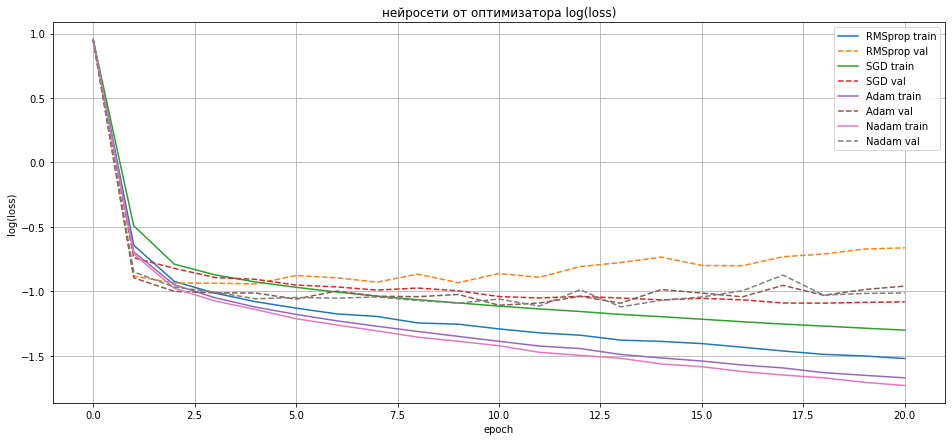

In [114]:
# создаем модель model
model = Sequential([
                      Dense(100, activation='relu', input_shape=(784,)),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 20
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for i_optim in [keras.optimizers.RMSprop(),keras.optimizers.SGD(),keras.optimizers.Adam(),keras.optimizers.Nadam()]:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(100, activation='relu', input_shape=(784,)),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
  train_images,
  to_categorical(train_labels),
  epochs=epochs,
  batch_size=32, validation_split=0.2, verbose = 0
  )

  results_optim['optim'].append(i_optim)
  results_optim['accuracy_tr'].append(hh.history['accuracy'][-1])
  results_optim['accuracy_val'].append(hh.history['val_accuracy'][-1])

  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')


plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [115]:
results_optim = pd.DataFrame(data=results_optim).sort_values('accuracy_val', ascending=False)

In [116]:
results_optim

,optim,accuracy_tr,accuracy_val
3,<tensorflow.python.keras.optimizer_v2.nadam.Na...,0.934042,0.888083
2,<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.929667,0.879417
1,<tensorflow.python.keras.optimizer_v2.gradient...,0.901354,0.879167
0,<tensorflow.python.keras.optimizer_v2.rmsprop....,0.926333,0.879083


**Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?**

Начали мы с бйзлайна в 0.8658 на тестовой выборке при числе нейронов в 128 и количестве слоев = 2. Промежуточный набор параметров со средним результатом 0.876667 оказался таким: нейронов = 100, слоев = 2, оптимизация = adam. На последнем шаге мы просмотрели варианты оптимизации + увеличели количество эпох и получили максимальный результат на тесте 0.888083. Разница между бэйзлайном и итоговым значением невилика. На улучшение результата повлиял оптимизатор и увеличение количества эпох. 

**Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)**

Не получилось выполнить для многоклассовой классификации, очень прошу разобрать на уроке или выложить решение по дз2